# Préparation des données

In [125]:
import pandas as pd

df = pd.read_csv('./../product_display/products/amazon.csv')

Drop de colonnes non pertinentes

In [126]:
df = df.drop(columns=["product_id", "rating_count", "user_id", "review_id","user_name", "img_link", "product_link", "stock"])
df

,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"230 Volts, 400 watts, 1 Year","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,International design and styling|Two heat sett...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...


Change les prix de str -> int

In [127]:
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["actual_price"] = df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["discount_percentage"] = ((df["actual_price"] - df["discounted_price"]) / df["actual_price"]) * 100
df["rating"] = df["rating"].str.replace("|", "").replace("", None).astype(float)
df

,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,4.2,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,4.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.403509,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,58.759521,4.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.123153,4.1,"230 Volts, 400 watts, 1 Year","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,27.954545,3.6,International design and styling|Two heat sett...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,25.978836,4.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...


Enlève les |

In [128]:
df["category"] = df["category"].apply(lambda x: str(x).replace("|", " ") if isinstance(x, str) else x)
df

,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories Accessories&Peripherals ...,399.0,1099.0,63.694268,4.2,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories Accessories&Peripherals ...,199.0,349.0,42.979943,4.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories Accessories&Peripherals ...,199.0,1899.0,89.520800,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories Accessories&Peripherals ...,329.0,699.0,52.932761,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories Accessories&Peripherals ...,154.0,399.0,61.403509,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen Kitchen&HomeAppliances WaterPurif...,379.0,919.0,58.759521,4.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen Kitchen&HomeAppliances SmallKitch...,2280.0,3045.0,25.123153,4.1,"230 Volts, 400 watts, 1 Year","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen Heating,Cooling&AirQuality RoomHe...",2219.0,3080.0,27.954545,3.6,International design and styling|Two heat sett...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen Heating,Cooling&AirQuality Fans E...",1399.0,1890.0,25.978836,4.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...


Embedding des données textuelles

In [129]:
col_to_embed = ["product_name", "about_product", "review_title", "review_content"]

df = df.drop(columns=col_to_embed)

In [130]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

LabelEncoder = LabelEncoder()
df["category"] = LabelEncoder.fit_transform(df["category"])

features = df.drop(columns=["category"])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(df_scaled, columns=features.columns)
df_scaled.fillna(0, inplace=True)

# Algo de clustering

Méthode du coude

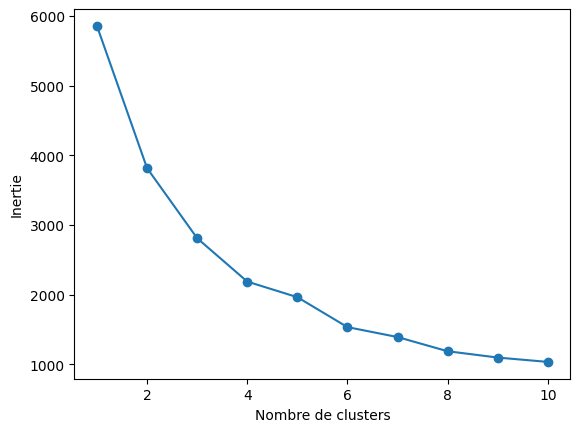

In [131]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


Méthode de la silhouette

In [132]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Score de silhouette pour {k} clusters : {score}")


Score de silhouette pour 2 clusters : 0.5798807616846101
Score de silhouette pour 3 clusters : 0.31289666426142393
Score de silhouette pour 4 clusters : 0.3037925621921698
Score de silhouette pour 5 clusters : 0.2515404716869114
Score de silhouette pour 6 clusters : 0.28685272963297526
Score de silhouette pour 7 clusters : 0.28874705338214063
Score de silhouette pour 8 clusters : 0.30932574402527985
Score de silhouette pour 9 clusters : 0.2973417956469737
Score de silhouette pour 10 clusters : 0.29616614470279823


K-mean

In [133]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)


# Analyse des clusters

c:\Users\simon\Documents\VSC\Mistral_hackathon\quantum-black-hackathon\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


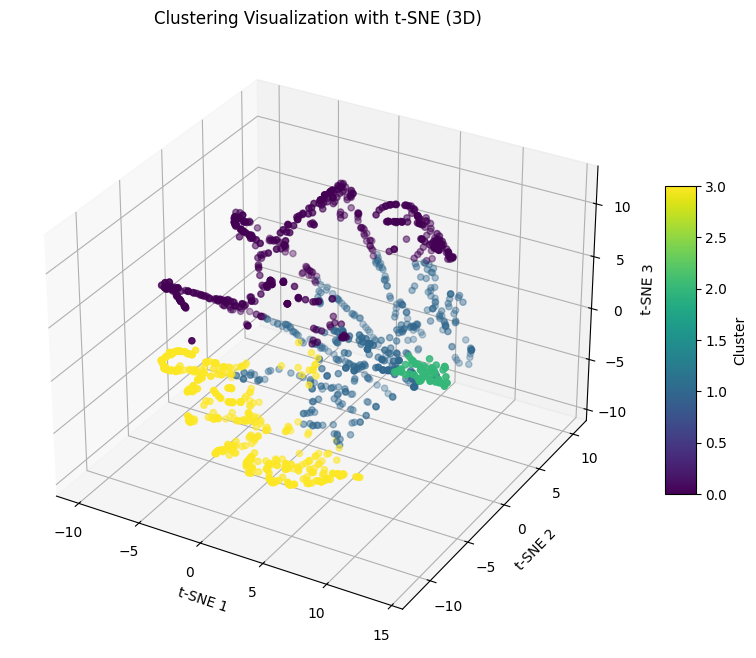

In [134]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import nécessaire pour la visualisation 3D

# Appliquer t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
reduced_data_tsne = tsne.fit_transform(df_scaled)

# Ajouter les composantes t-SNE au DataFrame
df['tsne1'] = reduced_data_tsne[:, 0]
df['tsne2'] = reduced_data_tsne[:, 1]
df['tsne3'] = reduced_data_tsne[:, 2]

# Visualisation des clusters en 3D avec t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['tsne1'], df['tsne2'], df['tsne3'], c=df['cluster'], cmap='viridis')

# Ajouter des labels et une légende
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('Clustering Visualization with t-SNE (3D)')

# Ajouter une barre de couleurs pour représenter les clusters
legend = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
legend.set_label('Cluster')

plt.show()


In [135]:
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)


           category  discounted_price  actual_price  discount_percentage  \
cluster                                                                    
0         72.921495       1041.646710   2975.287850            60.611932   
1        118.881960       3829.078686   5447.345122            23.367164   
2        104.783333      30972.283333  47646.350000            32.689500   
3         96.722090       1053.933753   2566.492447            59.329701   

           rating      tsne1     tsne2     tsne3  
cluster                                           
0        4.264299  -1.627100  1.762936  5.951893  
1        4.182366   2.424617  4.546632 -3.682921  
2        4.230000  11.259586 -3.304634  2.235447  
3        3.773159  -0.959881 -6.911176 -4.019388  
